# I. Problem statement

Dataset: https://archive.ics.uci.edu/ml/datasets/Adult

Prediction task is to determine whether a person makes over 50K a year.

* Class probabilities for adult.all file
* Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
* Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

Description of fnlwgt (final weight)

The weights on the CPS files are controlled to independent estimates of the
civilian noninstitutional population of the US.  These are prepared monthly
for us by Population Division here at the Census Bureau.  We use 3 sets of
controls.
  These are:
          1.  A single cell estimate of the population 16+ for each state.
          2.  Controls for Hispanic Origin by age and sex.
          3.  Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through
them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating
"weighted tallies" of any specified socio-economic characteristics of the
population.

People with similar demographic characteristics should have
similar weights.  There is one important caveat to remember
about this statement.  That is that since the CPS sample is
actually a collection of 51 state samples, each with its own
probability of selection, the statement only applies within
state.



# II. Variables

* age: continuous.

* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.

* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

* education-num: continuous.

* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

* sex: Female, Male.

* capital-gain: continuous.

* capital-loss: continuous.

* hours-per-week: continuous.

* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# III. Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

colNames = ['Age', 'WorkClass', 'FnlWgt', 'Education', 'Education-Num', 'Marital-Status', 'Occupation', 
            'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country', 'Salary']
dataset_train = pd.read_csv('data/adult-train.csv', header=None, names = colNames)
dataset_train.head(10)

dataset_test = pd.read_csv('data/adult-test.csv', header=None, names = colNames)
dataset_test.head(10)

,Age,WorkClass,FnlWgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


# IV. Data preprocessing

## a) Charts

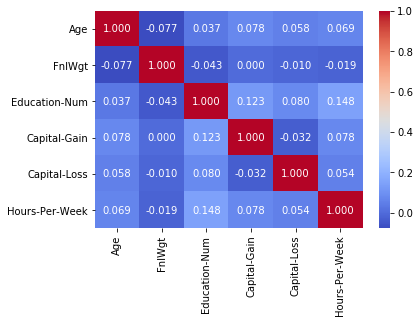

In [2]:
import seaborn as sns

cor_mat = dataset_train.corr()
sns.heatmap(cor_mat, annot=True, fmt='.3f', cmap='coolwarm')

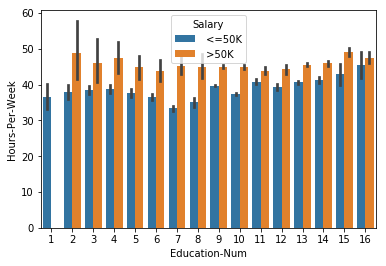

In [3]:
sns.barplot(x='Education-Num', y='Hours-Per-Week', hue='Salary', data=dataset_train)

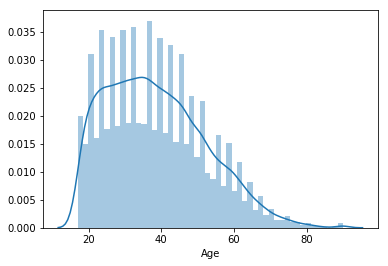

In [4]:
sns.distplot(dataset_train['Age'].dropna(), kde=True)

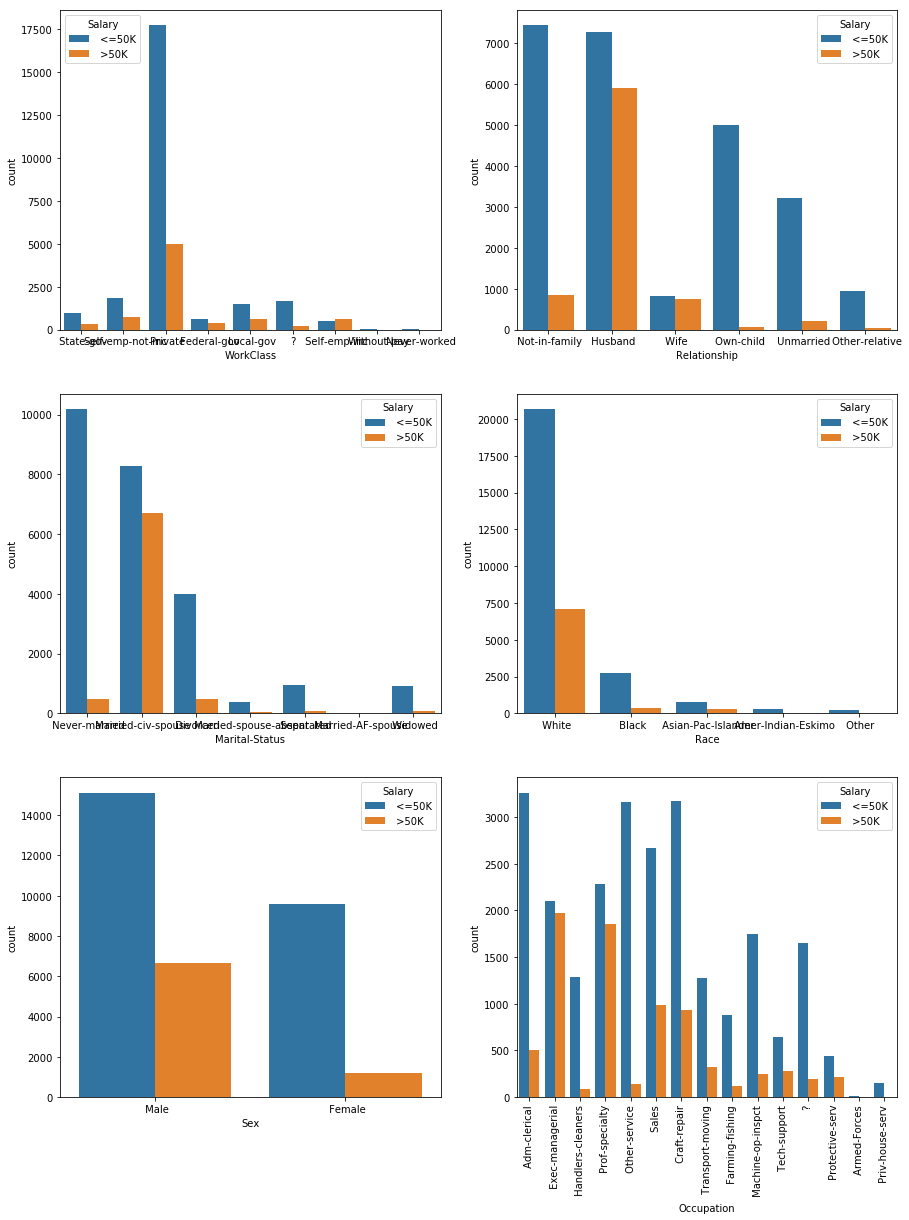

In [5]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))

sns.countplot(x='WorkClass', hue='Salary',data = dataset_train, ax=a)
sns.countplot(x='Relationship', hue='Salary', data = dataset_train, ax=b)
sns.countplot(x='Marital-Status', hue='Salary', data = dataset_train, ax=c)
sns.countplot(x='Race', hue='Salary', data = dataset_train, ax=d)
sns.countplot(x='Sex', hue='Salary', data = dataset_train, ax=e)
sns.countplot(x='Occupation', hue='Salary', data = dataset_train, ax=f)
plt.xticks(rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

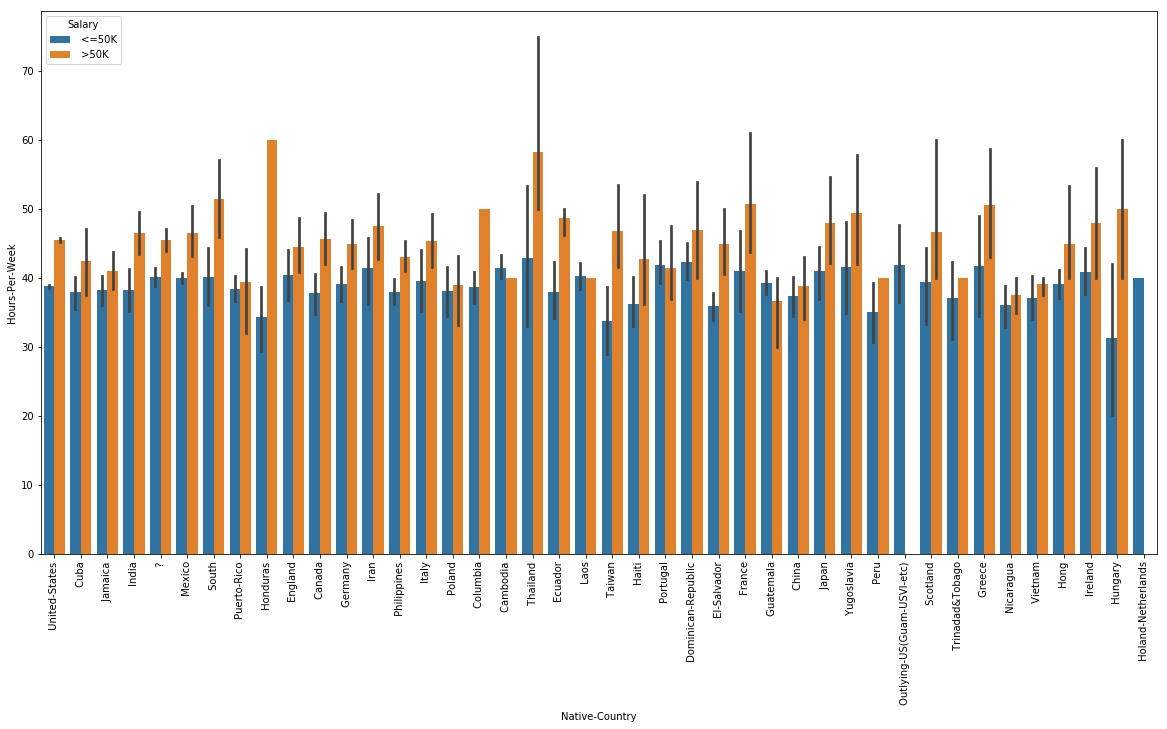

In [6]:
f,ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Native-Country', y='Hours-Per-Week', hue='Salary', data=dataset_train)
plt.xticks(rotation=90)

## b) Data Wrangling

* We tranform the 'Salary' attribute to the categorial values 'Yes' if people salary is greater than 50 K, 'No' if otherwise.

* Remove unknown data from both train and test data

* Normalize data

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Check code https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish#Some-Final-Encoding to encode the 
# category values to numerical values


labelEncoder = LabelEncoder()    
dataset_train = dataset_train.apply(labelEncoder.fit_transform)
dataset_test = dataset_test.apply(labelEncoder.fit_transform)

dropColumns = ['Salary', 'Education']
X_train = dataset_train.drop(dropColumns, axis=1)
Y_train = dataset_train['Salary']

X_test = dataset_test.drop(dropColumns, axis=1)
Y_test = dataset_test['Salary']

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


,Age,WorkClass,FnlWgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Salary
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0
5,20,4,17700,12,13,2,4,5,4,0,0,0,39,39,0
6,32,4,8536,6,4,3,8,1,2,0,0,0,15,23,0
7,35,6,13620,11,8,2,4,0,4,1,0,0,44,39,1
8,14,4,1318,12,13,4,10,1,4,0,105,0,49,39,1
9,25,4,8460,9,12,2,4,0,4,1,79,0,39,39,1


# V. Algorithms

## Common method

In [8]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def bestParamsClassifier(classifier, params):
    # Type of scoring used to compare parameter combinations
    acc_scorer = make_scorer(accuracy_score)
    # Run the grid search
    grid_obj = GridSearchCV(classifier, parameters, scoring=acc_scorer)
    grid_obj.fit(X_train, Y_train)

    # Set the clf to the best combination of parameters
    classifier = grid_obj.best_estimator_
    return classifier

from sklearn.model_selection import learning_curve

def callLearningCurve(estimator, X, y, train_sizes, cv):
    training_sizes, training_scores, test_cores = learning_curve(estimator, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 20))
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()

from sklearn.model_selection import validation_curve

def callValidationCure(estimator, X, y, param_name, param_range):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, scoring='accuracy')
    return train_scores, test_scores



def plotValidationCurve(param_range, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with SVM")
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show() 

## a) Logistic Regression

0.8227381610466188
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     12435
           1       0.70      0.44      0.54      3846

   micro avg       0.82      0.82      0.82     16281
   macro avg       0.77      0.69      0.71     16281
weighted avg       0.81      0.82      0.81     16281



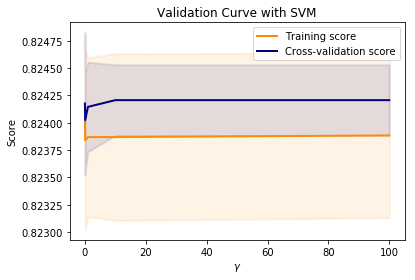

[[0.82512554 0.82328281 0.82361341]
 [0.82498733 0.82314461 0.82338308]
 [0.8248952  0.82328281 0.82342915]
 [0.82494126 0.82323674 0.82342915]
 [0.82494126 0.82323674 0.82347522]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

lg_classifier = LogisticRegression()
lg_classifier.fit(X_train, Y_train)
Y_lg_pred = lg_classifier.predict(X_test)
print(accuracy_score(Y_test, Y_lg_pred))
print(classification_report(Y_test, Y_lg_pred))

param_range = [0.01,0.1,1,10,100]
train_scores, test_scores = callValidationCure(LogisticRegression(), X_train, Y_train, param_name='C', 
                                               param_range=param_range)
plotValidationCurve(param_range, train_scores, test_scores)
print(train_scores)

#callLearningCurve(LogisticRegression(), X_train, Y_train, )

## b)  KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# validation_curve(KNeighborsClassifier(), X_train, Y_train, cv = 3)
# Reference: https://www.dataquest.io/blog/learning-curves-machine-learning/
#train_sizes, train_scores, validation_scores = learning_curve(KNeighborsClassifier(), X_train, Y_train, , cv = 3)


for i in [3, 5, 10, 20]:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train, Y_train)
    Y_knn_pred = knn_classifier.predict(X_test)
    print("KNN with neighbors ", i)
    print(accuracy_score(Y_test, Y_knn_pred))
    print(classification_report(Y_test, Y_knn_pred))
    


KNN with neighbors  3
0.8273447576930164
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     12435
           1       0.65      0.59      0.62      3846

   micro avg       0.83      0.83      0.83     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281



Base on flk2foi234jfio43jhgfo4q35hg

In [ ]:
train_scores, test_scores = callValidationCure(KNeighborsClassifier(), X_train, Y_train, "n_neighbors", [5,10, 20])
plotValidationCurve([5,10, 20], train_scores, train_scores)

## c) Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

for i in [3, 4, 5, 6]:
    dt_classifier = DecisionTreeClassifier(max_depth=i)
    dt_classifier.fit(X_train, Y_train)
    Y_dt_pred = dt_classifier.predict(X_test)
    print("Decision tree with max_dept ", i)
    print(classification_report(Y_test, Y_dt_pred))


## d) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

for i in [30,60,90]:
    rd_classifier = RandomForestClassifier(n_estimators=i)
    rd_classifier.fit(X_train, Y_train)
    Y_rf_pred = rd_classifier.predict(X_test)
    print(classification_report(Y_test, Y_rf_pred))

## e) AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

for i in [3,5,7,9]:
    ada_classifier = AdaBoostClassifier(n_estimators=i, learning_rate=0.5)
    ada_classifier.fit(X_train, Y_train)
    Y_ada_pred = ada_classifier.predict(X_test)
    print(metrics.accuracy_score(Y_test, Y_ada_pred))
    print(classification_report(Y_test, Y_ada_pred))

## f) Neural Network 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

for i in [100, 200, 300, 400, 500]:
    mlp_classifier = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=i)
    mlp_classifier.fit(X_train, Y_train)
    Y_nn_pred = mlp_classifier.predict(X_test)
    print(metrics.accuracy_score(Y_test, Y_nn_pred))
    print(classification_report(Y_test, Y_nn_pred))

# VI. AUC

In [ ]:
from sklearn.metrics import auc

?auc

# VII. References

1. [Plot validation curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html)

2. [Learning curve machine learning](https://www.dataquest.io/blog/learning-curves-machine-learning/)